The objective of this notebook is to apply concepts of Linear Regression using NBA data.

The main goal is to predict a team rank on percentage win based in previous seasons rankings

## Imports

In [1]:
import pandas as pd
import os

In [2]:
os.listdir("./input/")

['ranking.csv', 'teams.csv']

## Import Data Set

In [3]:
df = pd.read_csv("./input/ranking.csv")
df.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN
4,1610612746,0,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7,NaN


In [4]:
df

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN
4,1610612746,0,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210337,1610612765,0,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29,NaN
210338,1610612738,0,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32,NaN
210339,1610612753,0,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37,NaN
210340,1610612755,0,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32,NaN


In [5]:
print(f"this df has {df.shape[0]} rows and {df.shape[1]} columns")

this df has 210342 rows and 13 columns


In [6]:
df.columns

Index(['TEAM_ID', 'LEAGUE_ID', 'SEASON_ID', 'STANDINGSDATE', 'CONFERENCE',
       'TEAM', 'G', 'W', 'L', 'W_PCT', 'HOME_RECORD', 'ROAD_RECORD',
       'RETURNTOPLAY'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210342 entries, 0 to 210341
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TEAM_ID        210342 non-null  int64  
 1   LEAGUE_ID      210342 non-null  int64  
 2   SEASON_ID      210342 non-null  int64  
 3   STANDINGSDATE  210342 non-null  object 
 4   CONFERENCE     210342 non-null  object 
 5   TEAM           210342 non-null  object 
 6   G              210342 non-null  int64  
 7   W              210342 non-null  int64  
 8   L              210342 non-null  int64  
 9   W_PCT          210342 non-null  float64
 10  HOME_RECORD    210342 non-null  object 
 11  ROAD_RECORD    210342 non-null  object 
 12  RETURNTOPLAY   3990 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 20.9+ MB


In [8]:
df.describe()

,TEAM_ID,LEAGUE_ID,SEASON_ID,G,W,L,W_PCT,RETURNTOPLAY
count,2.103420e+05,210342.0,210342.000000,210342.000000,210342.000000,210342.000000,210342.000000,3990.000000
mean,1.610613e+09,0.0,21401.054773,56.659735,28.333357,28.326378,0.492833,0.600000
std,8.641501e+00,0.0,2395.250417,28.644294,17.268500,17.260557,0.187763,0.489959
min,1.610613e+09,0.0,12003.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.610613e+09,0.0,22006.000000,32.000000,14.000000,14.000000,0.372000,0.000000
50%,1.610613e+09,0.0,22011.000000,67.000000,28.000000,29.000000,0.500000,1.000000
75%,1.610613e+09,0.0,22017.000000,82.000000,42.000000,41.000000,0.621000,1.000000
max,1.610613e+09,0.0,22022.000000,82.000000,73.000000,72.000000,1.000000,1.000000


### Getting rows with 82 games played

This data set has team rank by each game.  
I will work with finished season rank to simplify the problem

In [9]:
finisehd_season_df = df.query('G == 82')
finisehd_season_df

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
1260,1610612756,0,22021,2022-09-29,West,Phoenix,82,64,18,0.780,32-9,32-9,NaN
1261,1610612763,0,22021,2022-09-29,West,Memphis,82,56,26,0.683,30-11,26-15,NaN
1262,1610612744,0,22021,2022-09-29,West,Golden State,82,53,29,0.646,31-10,22-19,NaN
1263,1610612742,0,22021,2022-09-29,West,Dallas,82,52,30,0.634,29-12,23-18,NaN
1264,1610612762,0,22021,2022-09-29,West,Utah,82,49,33,0.598,29-12,20-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210337,1610612765,0,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29,NaN
210338,1610612738,0,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32,NaN
210339,1610612753,0,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37,NaN
210340,1610612755,0,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32,NaN


What years did we had finished years?

In [10]:
finisehd_season_df['SEASON_ID'].unique()

array([22021, 22013, 22012, 22010, 22009, 22008, 22007, 22006, 22005,
       22004, 22003, 22002, 22018, 22017, 22016, 22015, 22014],
      dtype=int64)

How many teams did we had per season? I hope we find 30 per season

In [11]:
season_df = finisehd_season_df.groupby('SEASON_ID')['TEAM_ID']
season_df

In [12]:
[(index, len(x.unique())) for index, x in season_df]

[(22002, 29),
 (22003, 29),
 (22004, 30),
 (22005, 30),
 (22006, 30),
 (22007, 30),
 (22008, 30),
 (22009, 30),
 (22010, 30),
 (22012, 28),
 (22013, 30),
 (22014, 30),
 (22015, 30),
 (22016, 30),
 (22017, 30),
 (22018, 30),
 (22021, 30)]

seams that we have some teams missing in 2002, 2003, and 2012 seasons

I think this won't affect the model

## Ordanting data in --> year | position | win_pct

In [13]:
finisehd_season_df.sort_values('W_PCT')

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
198986,1610612755,0,22015,2016-09-27,East,Philadelphia,82,10,72,0.122,7-34,3-38,NaN
200576,1610612755,0,22015,2016-06-13,East,Philadelphia,82,10,72,0.122,7-34,3-38,NaN
200591,1610612755,0,22015,2016-06-12,East,Philadelphia,82,10,72,0.122,7-34,3-38,NaN
200606,1610612755,0,22015,2016-06-11,East,Philadelphia,82,10,72,0.122,7-34,3-38,NaN
200621,1610612755,0,22015,2016-06-10,East,Philadelphia,82,10,72,0.122,7-34,3-38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112092,1610612744,0,22015,2016-06-04,West,Golden State,82,73,9,0.890,39-2,34-7,NaN
110547,1610612744,0,22015,2016-09-15,West,Golden State,82,73,9,0.890,39-2,34-7,NaN
112452,1610612744,0,22015,2016-05-11,West,Golden State,82,73,9,0.890,39-2,34-7,NaN
111207,1610612744,0,22015,2016-08-02,West,Golden State,82,73,9,0.890,39-2,34-7,NaN


In [14]:
finisehd_season_df.sort_values('W_PCT').tail(20)

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
110667,1610612744,0,22015,2016-09-07,West,Golden State,82,73,9,0.89,39-2,34-7,NaN
111192,1610612744,0,22015,2016-08-03,West,Golden State,82,73,9,0.89,39-2,34-7,NaN
110652,1610612744,0,22015,2016-09-08,West,Golden State,82,73,9,0.89,39-2,34-7,NaN
112392,1610612744,0,22015,2016-05-15,West,Golden State,82,73,9,0.89,39-2,34-7,NaN
110637,1610612744,0,22015,2016-09-09,West,Golden State,82,73,9,0.89,39-2,34-7,NaN
112107,1610612744,0,22015,2016-06-03,West,Golden State,82,73,9,0.89,39-2,34-7,NaN
112407,1610612744,0,22015,2016-05-14,West,Golden State,82,73,9,0.89,39-2,34-7,NaN
111222,1610612744,0,22015,2016-08-01,West,Golden State,82,73,9,0.89,39-2,34-7,NaN
110622,1610612744,0,22015,2016-09-10,West,Golden State,82,73,9,0.89,39-2,34-7,NaN
110607,1610612744,0,22015,2016-09-11,West,Golden State,82,73,9,0.89,39-2,34-7,NaN


seams my dataset still have more lines than I predicted

I am thinking in a data set with 17 seasons / 30 teams, which would be near by 500 lines

I think I will have to group teams as well

In [15]:
df_rank_season = finisehd_season_df[['TEAM_ID', 'W_PCT', 'SEASON_ID']]
df_rank_season

,TEAM_ID,W_PCT,SEASON_ID
1260,1610612756,0.780,22021
1261,1610612763,0.683,22021
1262,1610612744,0.646,22021
1263,1610612742,0.634,22021
1264,1610612762,0.598,22021
...,...,...,...
210337,1610612765,0.354,22013
210338,1610612738,0.305,22013
210339,1610612753,0.280,22013
210340,1610612755,0.232,22013


In [16]:
df_rank_season.drop_duplicates(inplace=True)

C:\Users\samue\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Adjusting SEASON_ID to be actual year

In [17]:
df_rank_season['SEASON_ID'] = df_rank_season['SEASON_ID'] - 20000

C:\Users\samue\AppData\Local\Temp/ipykernel_3572/2265010183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rank_season['SEASON_ID'] = df_rank_season['SEASON_ID'] - 20000


In [18]:
df_rank_season

,TEAM_ID,W_PCT,SEASON_ID
1260,1610612756,0.780,2021
1261,1610612763,0.683,2021
1262,1610612744,0.646,2021
1263,1610612742,0.634,2021
1264,1610612762,0.598,2021
...,...,...,...
204412,1610612766,0.402,2014
204413,1610612765,0.390,2014
204414,1610612753,0.305,2014
204415,1610612755,0.220,2014


grouping by season and sorting values

In [19]:
df_rank_season.sort_values(['SEASON_ID', 'W_PCT'], inplace=True)
df_rank_season

C:\Users\samue\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,TEAM_ID,W_PCT,SEASON_ID
92909,1610612743,0.207,2002
181511,1610612739,0.207,2002
181510,1610612761,0.293,2002
181509,1610612748,0.305,2002
92908,1610612746,0.329,2002
...,...,...,...
1263,1610612742,0.634,2021
1262,1610612744,0.646,2021
5535,1610612748,0.646,2021
1261,1610612763,0.683,2021


## Checking information

In [20]:
df_rank_season.tail(30)

,TEAM_ID,W_PCT,SEASON_ID
1274,1610612745,0.244,2021
5549,1610612753,0.268,2021
5548,1610612765,0.280,2021
1273,1610612760,0.293,2021
5547,1610612754,0.305,2021
1272,1610612757,0.329,2021
1271,1610612758,0.366,2021
1270,1610612747,0.402,2021
1269,1610612759,0.415,2021
5546,1610612764,0.427,2021


In [21]:
df_teams = pd.read_csv("./input/teams.csv")
df_teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


In [22]:
df_teams.query('TEAM_ID == 1610612740')

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate


After some internet NBA rank checking, the data set is trustable

In [23]:
df_rank_season['TEAM_RANK'] = df_rank_season.groupby('SEASON_ID')['W_PCT'].rank(ascending=False, method='average')

C:\Users\samue\AppData\Local\Temp/ipykernel_3572/3390715355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rank_season['TEAM_RANK'] = df_rank_season.groupby('SEASON_ID')['W_PCT'].rank(ascending=False, method='average')


In [24]:
df_rank_season

,TEAM_ID,W_PCT,SEASON_ID,TEAM_RANK
92909,1610612743,0.207,2002,28.5
181511,1610612739,0.207,2002,28.5
181510,1610612761,0.293,2002,27.0
181509,1610612748,0.305,2002,26.0
92908,1610612746,0.329,2002,25.0
...,...,...,...,...
1263,1610612742,0.634,2021,5.0
1262,1610612744,0.646,2021,3.5
5535,1610612748,0.646,2021,3.5
1261,1610612763,0.683,2021,2.0


In [25]:
season_2021 = df_rank_season.tail(30)
season_2021

,TEAM_ID,W_PCT,SEASON_ID,TEAM_RANK
1274,1610612745,0.244,2021,30.0
5549,1610612753,0.268,2021,29.0
5548,1610612765,0.280,2021,28.0
1273,1610612760,0.293,2021,27.0
5547,1610612754,0.305,2021,26.0
1272,1610612757,0.329,2021,25.0
1271,1610612758,0.366,2021,24.0
1270,1610612747,0.402,2021,23.0
1269,1610612759,0.415,2021,22.0
5546,1610612764,0.427,2021,21.0


## Ploting analisys

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

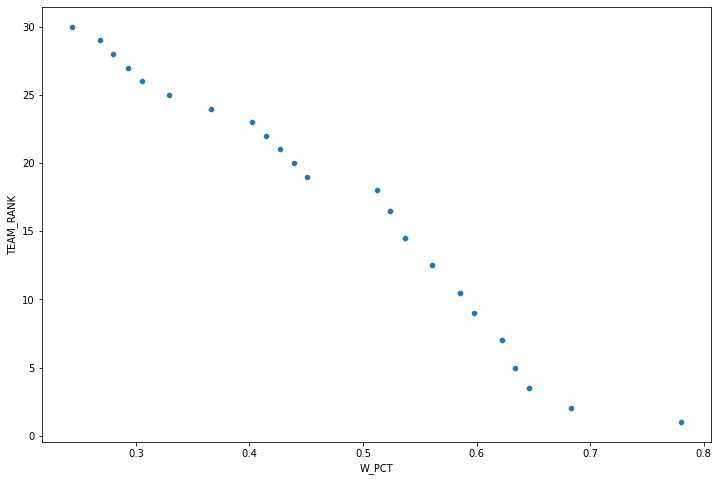

In [27]:
plt.subplots(figsize = (12,8))

## Plotting target variable with predictor variable(OverallQual)
sns.scatterplot(y=season_2021['TEAM_RANK'], x=season_2021['W_PCT']);

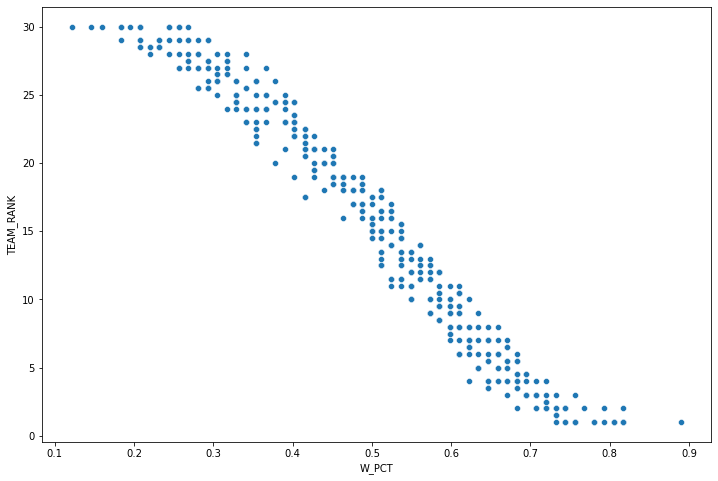

In [28]:
plt.subplots(figsize = (12,8))

## Plotting target variable with predictor variable(OverallQual)
sns.scatterplot(y=df_rank_season['TEAM_RANK'], x=df_rank_season['W_PCT']);

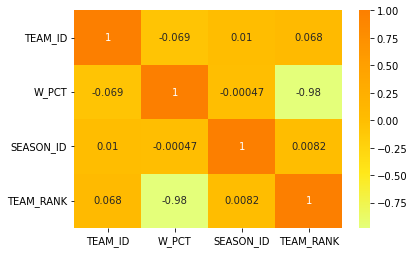

In [29]:
corr = df_rank_season.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

C:\Users\samue\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution rank in Win Percentage')

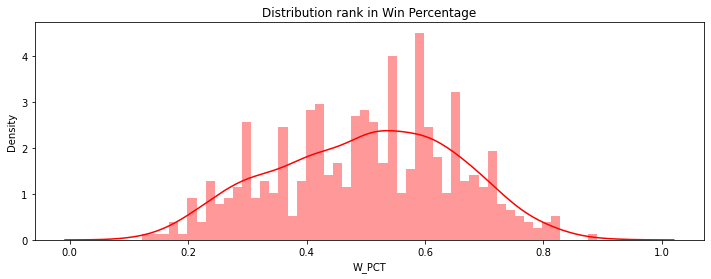

In [30]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(111)
sns.distplot(df_rank_season['W_PCT'],bins=50,color='r',ax=ax)
ax.set_title('Distribution rank in Win Percentage')


## Modeling

### Train test Split

In [35]:
from sklearn.model_selection import train_test_split
X = df_rank_season[['W_PCT']] # Independet variable
y = df_rank_season['TEAM_RANK'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

LinearRegression()

## Model Evaluation

In [38]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)
print('The Mean Square Error(MSE) or J(theta) is: ', J_mse_sk)

The Mean Square Error(MSE) or J(theta) is:  3.083914295338823


MSE says the avarage squared error for the output. 

RMSE will get us the error in the same scale as the output

In [39]:
J_mse_sk**(1/2)

1.7561077117702157

This says that we have a mean error of +-1.75 ranks given a team win percentage

Is that good? since we have 30 teams, 15 should be the mean.